# Image Recognition using Machine Learning
## Dimnesionality Reduction Using: Principal Component Analysis

Step - 1: Import required libraries

In [ ]:
import cv2
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.decomposition import PCA
from sklearn.neighbors import KNeighborsClassifier
from google.colab.patches import cv2_imshow as C
from google.colab import drive
from sklearn.preprocessing import StandardScaler
drive.mount('/content/Drive')

Drive already mounted at /content/Drive; to attempt to forcibly remount, call drive.mount("/content/Drive", force_remount=True).


### Loading images from Google Drive

Using Computer vision libraray for reading images [ images with 3 channels ]

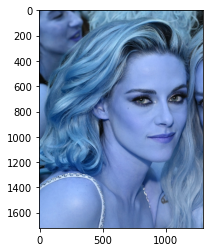

width: 1290 pixels
height: 1720  pixels
channels: 3


In [ ]:
# load the image from disk via "cv2.imread" and then grab the spatial
# dimensions, including width, height, and number of channels
image = cv2.imread('/content/Drive/MyDrive/ML_Proj/ks/ks1.jpg')
(h, w, c) = image.shape[:3]
plt.imshow(image)
plt.show()
print("width: {} pixels".format(w))
print("height: {}  pixels".format(h))
print("channels: {}".format(c))

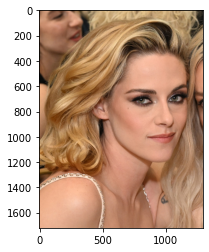

width: 1290 pixels
height: 1720  pixels
channels: 3


In [ ]:
ColorImg = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
plt.imshow(ColorImg)
plt.show()
(h, w, c) = ColorImg.shape[:3]
print("width: {} pixels".format(w))
print("height: {}  pixels".format(h))
print("channels: {}".format(c))

### Face detection and eye detection using CascadeClassifier

In [ ]:
face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')
eye_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_eye.xml')

[[559 437 719 719]]
(1720, 1290, 3)


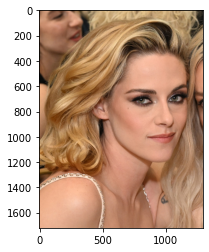

In [ ]:
# Detect faces
faces = face_cascade.detectMultiScale(image,1.1, 5)
print(faces)
# Draw rectangle around the faces
for (x, y, w, h) in faces:
    cv2.rectangle(image, (x, y), (x + w, y + h), (255, 0, 0), 2)
    roi_gray = ColorImg[y:y+h, x:x+w]
    roi_color = image[y:y+h, x:x+w]
    eyes = eye_cascade.detectMultiScale(roi_gray)
    for (ex,ey,ew,eh) in eyes:
            cv2.rectangle(roi_color,(ex,ey),(ex+ew,ey+eh),(0,255,0),2)

print(ColorImg.shape)
plt.imshow(ColorImg)
plt.show()

In [ ]:
Names = ['ks','vk','cbn','chad','rdj','pv','j','jb','ntr','zk','rt','r','apj','sp']

## Treating Each pixel a feature and scaling cropped face image into 64*64 image
## therefore, we will have 4096 features

In [ ]:
DF = pd.DataFrame()
Images = []
k = 0
for name in Names:
    Matrix = []
    for i in range(1,16):
        #print("S_No:",i,end = " ")
        #print()
        image = cv2.imread('/content/Drive/MyDrive/ML_Proj/'+name+'/'+name+str(i)+'.jpg')
        ColorImg = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
        faces = face_cascade.detectMultiScale(image,1.1, 5)
        flag = 0
        for (x, y, w, h) in faces:
            cv2.rectangle(image, (x, y), (x + w, y + h), (255, 0, 0), 2)
            roi_gray = ColorImg[y:y+h, x:x+w]
            roi_color = image[y:y+h, x:x+w]
            eyes = eye_cascade.detectMultiScale(roi_gray)
            for (ex,ey,ew,eh) in eyes:
                    flag = 1
                    X,Y,W,H = x,y,w,h
                    cv2.rectangle(roi_color,(ex,ey),(ex+ew,ey+eh),(0,255,0),2)
        if flag == 1:
            cropped_image = ColorImg[Y:Y+H,X:X+W]
        else:
            a,b,c,d = faces[0]
            cropped_image = ColorImg[b:b+d,a:a++c]
        #print(faces)
        #print("ORIGINAL IMAGE: ")
        #plt.imshow(image)
        #plt.show()
        stretch_near = cv2.resize(cropped_image, (64, 64),interpolation = cv2.INTER_LINEAR)
        gray = cv2.cvtColor(stretch_near, cv2.COLOR_RGB2GRAY)
        arr = np.array(gray)
        flat_arr = arr.flatten()
        #print(flat_arr)
        Matrix.append(flat_arr)
        LI = []
        for item in arr:
            LI.append(item/255)
        Images.append(LI)
        #print("FACE: ")
        #plt.imshow(gray,cmap = 'gray')
        #plt.show()
    df = pd.DataFrame(Matrix,dtype = 'object')
    DF = pd.concat([DF,df], ignore_index = True)

### extracting Data Frame from all the images considered

In [ ]:
DF

,0,1,2,3,4,5,6,7,8,9,...,4086,4087,4088,4089,4090,4091,4092,4093,4094,4095
0,141,155,119,109,135,47,77,111,152,116,...,138,148,149,146,129,121,93,102,102,93
1,88,103,106,151,145,152,101,106,38,38,...,55,61,61,61,56,59,59,58,54,51
2,153,165,168,144,63,30,31,11,19,27,...,36,48,36,25,43,53,46,55,23,48
3,32,31,34,32,53,42,34,22,20,29,...,170,169,162,167,162,156,148,146,129,133
4,59,35,25,24,17,18,14,15,20,23,...,1,1,1,2,2,1,1,1,3,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
205,26,23,50,13,23,26,11,74,29,21,...,142,142,142,142,142,142,142,142,142,142
206,59,59,59,58,61,61,56,70,99,83,...,76,227,244,250,249,253,240,137,125,133
207,116,115,116,116,118,38,30,14,19,16,...,148,147,146,146,144,146,145,144,144,145
208,14,16,23,24,27,31,42,55,77,100,...,13,13,13,13,13,13,13,13,13,13


In [ ]:
li = []
for i in range(14):
    for j in range(15):
        li.append(i)
Y = pd.DataFrame(li)

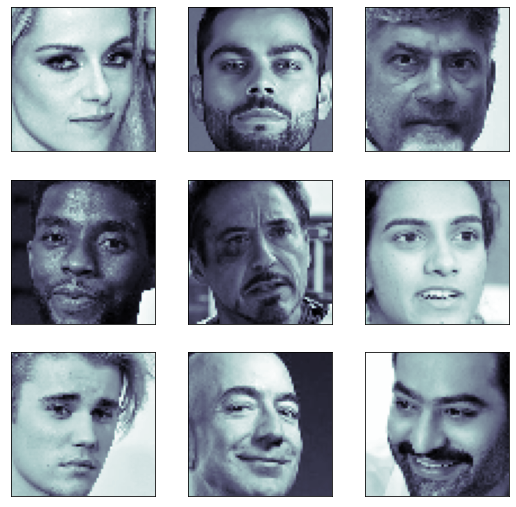

In [ ]:
from matplotlib import pyplot as plt
fig = plt.figure(figsize=(9,9))
# plot several images
for i in range(9):
    ax = fig.add_subplot(3, 3, i + 1, xticks=[], yticks=[])
    ax.imshow(Images[i*15], cmap=plt.cm.bone)

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(DF,Y,test_size=0.2, random_state = 45)
print(X_train.shape, X_test.shape)

(168, 4096) (42, 4096)


In [ ]:
from sklearn import decomposition
pca = decomposition.PCA(n_components = 34,whiten = True)
pca.fit(X_train)

PCA(n_components=34, whiten=True)

In [ ]:
P = pd.DataFrame(pca.components_.T)
P

,0,1,2,3,4,5,6,7,8,9,...,24,25,26,27,28,29,30,31,32,33
0,0.024158,-0.010416,-0.016120,0.028878,0.017263,-0.005382,-0.021328,-0.038004,0.012879,-0.009901,...,-0.015363,-0.002897,-0.003555,0.015873,0.042122,-0.013329,0.042449,0.018407,-0.049111,-0.053799
1,0.024906,-0.012278,-0.014410,0.029406,0.014128,-0.004653,-0.021104,-0.041926,0.003081,-0.007973,...,-0.012678,0.011867,0.003790,-0.001553,0.029866,-0.018070,0.030885,0.023021,-0.039860,-0.034004
2,0.024260,-0.012458,-0.015688,0.028475,0.015512,-0.012337,-0.017782,-0.040394,0.002194,-0.007495,...,-0.017673,0.013530,0.009659,0.010559,0.032692,-0.016177,0.030502,0.022937,-0.035213,-0.029897
3,0.023904,-0.014948,-0.014631,0.023371,0.006994,-0.016068,-0.022592,-0.043207,-0.009051,-0.004100,...,0.004658,0.024442,0.012740,-0.001026,0.039140,-0.016772,0.005932,0.025035,-0.034256,-0.009252
4,0.023006,-0.015739,-0.013086,0.021505,0.003050,-0.015366,-0.021652,-0.041809,-0.010811,-0.002405,...,0.003157,0.030714,0.004552,-0.001661,0.037456,0.000217,0.000493,0.033734,-0.029373,-0.005980
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4091,0.016603,0.028093,-0.018392,-0.021261,0.023127,0.032853,-0.003321,-0.000004,-0.025734,-0.016625,...,-0.029750,-0.007143,-0.005464,-0.006965,-0.021123,-0.016680,0.014274,-0.020618,0.032522,-0.010373
4092,0.017019,0.028456,-0.020254,-0.023769,0.026354,0.029834,-0.005788,0.003585,-0.025120,-0.017103,...,-0.023010,-0.006108,0.010137,-0.018099,-0.022650,-0.005922,0.002530,-0.028860,0.011843,-0.020535
4093,0.017741,0.028722,-0.021522,-0.023760,0.027079,0.027346,-0.012076,0.007125,-0.021526,-0.013556,...,-0.029209,0.002209,0.023329,-0.013599,-0.028925,-0.011210,0.013399,-0.031930,0.010861,-0.022708
4094,0.018391,0.028175,-0.021776,-0.021481,0.028863,0.030043,-0.010462,0.008180,-0.017321,-0.012623,...,-0.034393,0.008254,0.019432,-0.007800,-0.025122,-0.010776,0.016599,-0.032341,0.020355,-0.024178


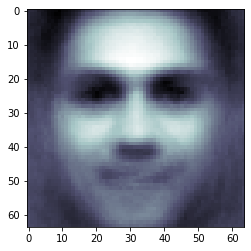

In [ ]:
plt.imshow(pca.mean_.reshape(64,64),cmap=plt.cm.bone)

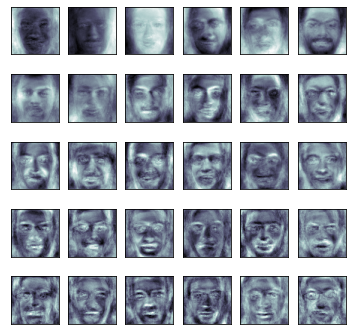

In [ ]:
fig = plt.figure(figsize=(6, 6))
for i in range(30):
    ax = fig.add_subplot(5, 6, i + 1, xticks=[], yticks=[])
    ax.imshow(pca.components_[i].reshape((64,64)),cmap=plt.cm.bone)

In [ ]:
X_train_pca = pca.transform(X_train)
X_test_pca = pca.transform(X_test)
print(X_train_pca.shape)

(168, 34)


In [ ]:
li = pca.explained_variance_ratio_
add = 0
lix = []
liy = []
for i in range(len(li)):
    lix.append(i+1)
    add += li[i]
    #print(int(add*100))
    liy.append(int(add*100))

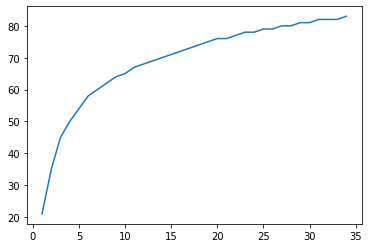

In [ ]:
plt.plot(lix,liy)

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors = 1)
knn.fit(X_train_pca,y_train)

/usr/local/lib/python3.8/dist-packages/sklearn/neighbors/_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


KNeighborsClassifier(n_neighbors=1)

In [ ]:
from sklearn.metrics import accuracy_score
y_pred = knn.predict(X_test_pca)
print(accuracy_score(y_test,y_pred))

0.5476190476190477


In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.25      0.33      0.29         3
           1       1.00      0.50      0.67         2
           2       0.80      1.00      0.89         4
           3       0.50      1.00      0.67         1
           4       0.67      0.33      0.44         6
           5       1.00      0.75      0.86         4
           6       0.00      0.00      0.00         2
           7       0.40      0.67      0.50         3
           8       1.00      0.50      0.67         4
           9       0.33      1.00      0.50         2
          10       0.25      0.33      0.29         3
          11       0.50      1.00      0.67         2
          12       1.00      0.40      0.57         5
          13       0.00      0.00      0.00         1

    accuracy                           0.55        42
   macro avg       0.55      0.56      0.50        42
weighted avg       0.64      0.55      0.54        42



/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


### Making Training and Testing data in more uniform way

In [ ]:
Images = []
k = 0
DFx_train = pd.DataFrame()
DFx_test = pd.DataFrame()
DFy_train = pd.DataFrame()
DFy_test = pd.DataFrame()
for name in Names:
    Matrix = []
    for i in range(1,16):
        #print("S_No:",i,end = " ")
        #print()
        image = cv2.imread('/content/Drive/MyDrive/ML_Proj/'+name+'/'+name+str(i)+'.jpg')
        ColorImg = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
        faces = face_cascade.detectMultiScale(image,1.1, 5)
        flag = 0
        for (x, y, w, h) in faces:
            cv2.rectangle(image, (x, y), (x + w, y + h), (255, 0, 0), 2)
            roi_gray = ColorImg[y:y+h, x:x+w]
            roi_color = image[y:y+h, x:x+w]
            eyes = eye_cascade.detectMultiScale(roi_gray)
            for (ex,ey,ew,eh) in eyes:
                    flag = 1
                    X,Y,W,H = x,y,w,h
                    cv2.rectangle(roi_color,(ex,ey),(ex+ew,ey+eh),(0,255,0),2)
        if flag == 1:
            cropped_image = ColorImg[Y:Y+H,X:X+W]
        else:
            a,b,c,d = faces[0]
            cropped_image = ColorImg[b:b+d,a:a++c]
        #print(faces)
        #print("ORIGINAL IMAGE: ")
        #plt.imshow(image)
        #plt.show()
        stretch_near = cv2.resize(cropped_image, (64, 64),interpolation = cv2.INTER_LINEAR)
        gray = cv2.cvtColor(stretch_near, cv2.COLOR_RGB2GRAY)
        arr = np.array(gray)
        flat_arr = arr.flatten()
        #print(flat_arr)
        Matrix.append(flat_arr)
        LI = []
        for item in arr:
            LI.append(item/255)
        Images.append(LI)
        #print("FACE: ")
        #plt.imshow(gray,cmap = 'gray')
        #plt.show()
    LI = []
    for t in range(15):
        LI.append(k)
    k += 1
    S = pd.Series(LI)
    df = pd.DataFrame(Matrix,dtype = 'object')
    print(df.size)
    X_train ,X_test ,Y_train, Y_test = train_test_split(df,S,test_size = 0.2,random_state = 45)
    DFx_train = pd.concat([DFx_train,X_train], ignore_index = True)
    DFx_test = pd.concat([DFx_test,X_test],ignore_index = True)
    DFy_train = pd.concat([DFy_train,pd.Series(Y_train)],ignore_index = True)
    DFy_test = pd.concat([DFy_test,pd.Series(Y_test)],ignore_index = True)
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors = 1)
from sklearn import decomposition
pca = decomposition.PCA(whiten = True)
pca.fit(DFx_train)
X_train_pca = pca.transform(DFx_train)
X_test_pca = pca.transform(DFx_test)
#print(X_train_pca.shape)
knn.fit(X_train_pca,DFy_train)
from sklearn.metrics import accuracy_score
Y_pred = knn.predict(X_test_pca)

61440
61440
61440
61440
61440
61440
61440
61440
61440
61440
61440
61440
61440
61440


/usr/local/lib/python3.8/dist-packages/sklearn/neighbors/_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


In [ ]:
li = pca.explained_variance_ratio_
add = 0
lix = []
liy = []
for i in range(len(li)):
    lix.append(i+1)
    add += li[i]
    #print(int(add*100))
    liy.append(int(add*100))

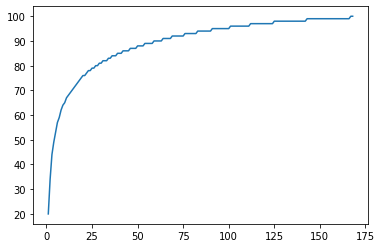

In [ ]:
plt.plot(lix,liy)

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors = 1)
knn.fit(X_train_pca,DFy_train)

/usr/local/lib/python3.8/dist-packages/sklearn/neighbors/_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


KNeighborsClassifier(n_neighbors=1)

In [ ]:
from sklearn.metrics import accuracy_score
Y_pred = knn.predict(X_test_pca)
print(accuracy_score(DFy_test,Y_pred))

0.047619047619047616


In [ ]:
Y_pred

array([ 2.,  2.,  2., 12.,  2., 12.,  2., 12., 12.,  2., 12.,  2., 12.,
       12., 12., 12., 12., 12.,  2., 12., 12., 12., 12.,  2.,  2.,  2.,
       12.,  2.,  2.,  2.,  2.,  2.,  2., 12., 12., 12.,  2., 12.,  2.,
       12.,  2., 12.])

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.25      0.33      0.29         3
           1       1.00      0.50      0.67         2
           2       0.80      1.00      0.89         4
           3       0.50      1.00      0.67         1
           4       0.67      0.33      0.44         6
           5       1.00      0.75      0.86         4
           6       0.00      0.00      0.00         2
           7       0.40      0.67      0.50         3
           8       1.00      0.50      0.67         4
           9       0.33      1.00      0.50         2
          10       0.25      0.33      0.29         3
          11       0.50      1.00      0.67         2
          12       1.00      0.40      0.57         5
          13       0.00      0.00      0.00         1

    accuracy                           0.55        42
   macro avg       0.55      0.56      0.50        42
weighted avg       0.64      0.55      0.54        42



/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
